Non Local Means
===============

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour study image denoising using
non-local means. This algorithm has been
introduced for denoising purposes in [BuaCoMoA05](#biblio)

In [1]:
using PyPlot
using NtToolBox

Patches in Images
-----------------
This numerical tour is dedicated to the study of the structure of patches
in images.


Size $N = n \times n$ of the image.

In [2]:
n = 128

128

We load a noisy image $f_0\in \RR^N$.

In [3]:
c = [100, 200]
f0 = load_image("NtToolBox/src/data/lena.png")
f0 = rescale(f0[c[1] - Base.div(n, 2) + 1 : c[1] + Base.div(n, 2), c[2] - Base.div(n, 2) + 1 : c[2] + Base.div(n, 2)])

128×128 Array{Float32,2}:
 0.362205  0.362205  0.354331  0.401575  …  0.354331  0.362205  0.362205
 0.385827  0.354331  0.346457  0.362205     0.417323  0.385827  0.401575
 0.338583  0.338583  0.362205  0.346457     0.377953  0.385827  0.401575
 0.346457  0.338583  0.354331  0.362205     0.362205  0.362205  0.362205
 0.385827  0.338583  0.338583  0.354331     0.370079  0.377953  0.338583
 0.370079  0.362205  0.385827  0.354331  …  0.354331  0.385827  0.346457
 0.330709  0.354331  0.385827  0.346457     0.362205  0.377953  0.346457
 0.354331  0.362205  0.362205  0.354331     0.393701  0.362205  0.346457
 0.346457  0.354331  0.354331  0.354331     0.330709  0.393701  0.362205
 0.385827  0.354331  0.385827  0.354331     0.330709  0.330709  0.385827
 0.354331  0.354331  0.338583  0.377953  …  0.354331  0.354331  0.362205
 0.354331  0.354331  0.385827  0.362205     0.330709  0.338583  0.346457
 0.362205  0.370079  0.370079  0.385827     0.338583  0.362205  0.330709
 ⋮                       

Display $f_0$.

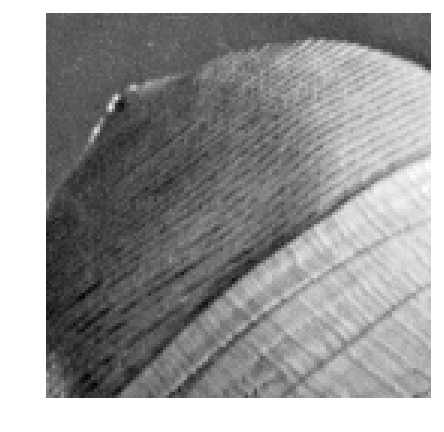

In [4]:
figure(figsize = (5, 5))
imageplot(f0)

Noise level $\si$.

In [5]:
sigma = .04

0.04

Generate a noisy image $f=f_0+\epsilon$ where $\epsilon \times
\Nn(0,\si^2\text{Id}_N)$.

In [6]:
using Distributions
f = f0 .+ sigma.*rand(Normal(), n, n)

128×128 Array{Float64,2}:
 0.396951  0.342381  0.303688  0.399901  …  0.410418  0.267115  0.333227
 0.301579  0.307922  0.337363  0.372513     0.386936  0.408856  0.332734
 0.324208  0.416299  0.393768  0.386598     0.311817  0.375446  0.345671
 0.329322  0.370273  0.303632  0.374274     0.401659  0.26      0.401739
 0.385475  0.382444  0.29791   0.366216     0.375648  0.303598  0.309772
 0.340298  0.333235  0.37933   0.287425  …  0.341687  0.387895  0.405342
 0.33367   0.319912  0.401238  0.328327     0.347158  0.344435  0.402736
 0.325108  0.325193  0.352591  0.343493     0.400149  0.43723   0.286894
 0.374157  0.417435  0.354024  0.344261     0.354247  0.411508  0.348303
 0.434649  0.354637  0.355311  0.35145      0.314061  0.319652  0.34884 
 0.391885  0.320219  0.362818  0.346647  …  0.378095  0.383932  0.350168
 0.322284  0.335377  0.390283  0.360143     0.335099  0.400773  0.336348
 0.337423  0.416808  0.35641   0.40904      0.399011  0.3844    0.369217
 ⋮                       

Display $f$.

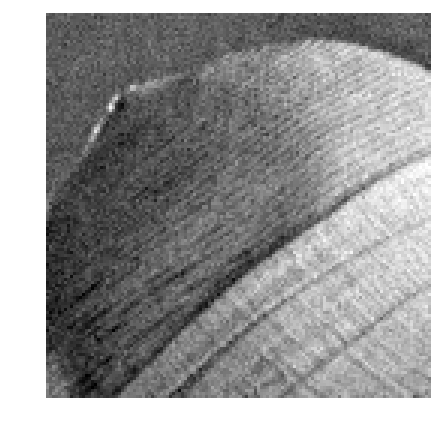

In [7]:
figure(figsize = (5,5))
imageplot(clamP(f))

We denote $w$ to be the half width of the patches,
and $w_1=2w+1$ the full width.

In [8]:
w = 3
w1 = 2*w + 1

7

We set up large $(n,n,w_1,w_1)$ matrices to index the the X and Y
position of the pixel to extract.

Location of pixels to extract.

In [9]:
include("ndgrid.jl") # Il ne faut pas oublier de mettre ndgrid.jl dans le package et exporter la fonction meshgrid.
(X, Y) = meshgrid(1 : n, 1 : n)
(dX, dY) = meshgrid(-w : w, -w : w)
dX = reshape(dX, (1, 1, w1, w1))
dY = reshape(dY, (1, 1, w1, w1))
X = repeat(X, inner = [1, 1, w1, w1]) + repeat(dX, inner = [n, n, 1, 1])
Y = repeat(Y, inner = [1, 1, w1, w1]) + repeat(dY, inner = [n, n, 1, 1])

128×128×7×7 Array{Int64,4}:
[:, :, 1, 1] =
  -2   -2   -2   -2   -2   -2   -2   -2  …   -2   -2   -2   -2   -2   -2   -2
  -1   -1   -1   -1   -1   -1   -1   -1      -1   -1   -1   -1   -1   -1   -1
   0    0    0    0    0    0    0    0       0    0    0    0    0    0    0
   1    1    1    1    1    1    1    1       1    1    1    1    1    1    1
   2    2    2    2    2    2    2    2       2    2    2    2    2    2    2
   3    3    3    3    3    3    3    3  …    3    3    3    3    3    3    3
   4    4    4    4    4    4    4    4       4    4    4    4    4    4    4
   5    5    5    5    5    5    5    5       5    5    5    5    5    5    5
   6    6    6    6    6    6    6    6       6    6    6    6    6    6    6
   7    7    7    7    7    7    7    7       7    7    7    7    7    7    7
   8    8    8    8    8    8    8    8  …    8    8    8    8    8    8    8
   9    9    9    9    9    9    9    9       9    9    9    9    9    9    9
  10   10   10   10  

We handle boundary condition by reflexion

In [10]:
X[X .< 1] = 2 .- X[X .< 1] 
Y[Y .< 1] = 2 .- Y[Y .< 1]
X[X .> n] = 2*n .- X[X .> n]
Y[Y .> n] = 2*n .- Y[Y .> n]

5376-element Array{Int64,1}:
 127
 127
 127
 127
 127
 127
 127
 127
 127
 127
 127
 127
 127
   ⋮
 127
 126
 125
 127
 126
 125
 127
 126
 125
 127
 126
 125

Patch extractor operator.

In [11]:
I = X .+ (Y .- 1)*n
for i in 1 : Base.div(n, w)
    for j in 1 : Base.div(n, w)
        I[i, j, :, :] = transpose(I[i, j, :, :])
    end
end
        
#function patch(f)
#    P = zeros(n, n, w1, w1)
#    for i in 1:length(f[:, 1])
#        for j in 1:length(f[1, :])
#            P[i, j, :, :] = f[I[i, j, :, :]]
#        end
#    end
#    return P
#end
function patch(f)
    return f[I]
end

patch (generic function with 1 method)

Define the patch matrix $P$ of size $(n,n,w_1,w_1)$.
Each $P(i,j,:,:)$ represent an $(w_1,w_1)$ patch extracted around pixel
$(i,j)$ in the image.

In [12]:
P = patch(f)

128×128×7×7 Array{Float64,4}:
[:, :, 1, 1] =
 0.374274  0.386598  0.372513  0.399901  …  0.407289  0.396971  0.503304
 0.303632  0.393768  0.337363  0.303688     0.395474  0.457786  0.368035
 0.370273  0.416299  0.307922  0.342381     0.3895    0.438362  0.365604
 0.329322  0.324208  0.301579  0.396951     0.415704  0.549646  0.563263
 0.370273  0.416299  0.307922  0.342381     0.3895    0.438362  0.365604
 0.303632  0.393768  0.337363  0.303688  …  0.395474  0.457786  0.368035
 0.374274  0.386598  0.372513  0.399901     0.407289  0.396971  0.503304
 0.340467  0.333065  0.413554  0.361197     0.372864  0.403578  0.503039
 0.304912  0.408745  0.427419  0.378724     0.465719  0.505476  0.454114
 0.400601  0.379937  0.35387   0.299534     0.398921  0.530941  0.282586
 0.264499  0.433349  0.413498  0.464159  …  0.33123   0.411392  0.260079
 0.384172  0.360168  0.316385  0.436368     0.366519  0.308131  0.264248
 0.356013  0.34836   0.327879  0.363063     0.268135  0.188501  0.214688
 ⋮    

Display some example of patches.

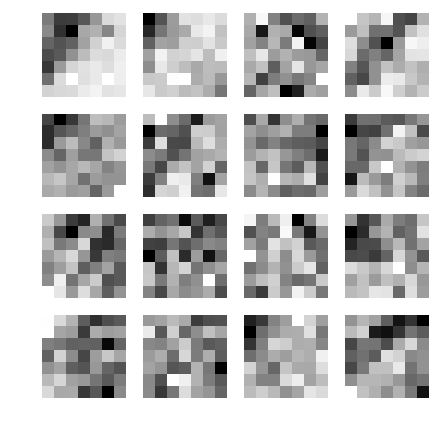

In [13]:
figure(figsize = (5,5))
for i in 1:16
    x = rand(1 : n)
    y = rand(1 : n)
    imageplot(P[x, y, :, :], "", [4, 4, i])
end

Dimensionality Reduction with PCA
---------------------------------
Since NL-means type algorithms require the computation of many distances
between patches, it is advantagous to reduce the dimensionality of the
patch while keeping as much as possible of information.


Target dimensionality $d$.

In [14]:
d = 25

25

A linear dimensionality reduction is obtained by Principal Component
Analysis (PCA) that projects the data on a small number of leading
direction of the covariance matrix of the patches.


Turn the patch matrix into an $(w_1*w_1,n*n)$ array, so that each $P(:,i)$
is a $w_1*w_1$ vector representing a patch.

In [15]:
resh = P -> transpose((reshape(P, (n*n,w1*w1))))

(::#3) (generic function with 1 method)

Operator to remove the mean of the patches to each patch.

In [16]:
remove_mean = Q -> Q - repeat(mean(Q, 1), inner = (w1*w1, 1))

(::#5) (generic function with 1 method)

Compute the mean and the covariance of the points cloud representing the
patches.

In [17]:
P1 = remove_mean(resh(P))
C = P1*transpose(P1)

49×49 Array{Float64,2}:
 132.566     79.0387    47.4375   …  -25.9926   -22.9062   -17.7451 
  79.0387   122.247     69.4074      -26.7349   -27.1669   -23.1153 
  47.4375    69.4074   113.44        -27.0204   -27.1488   -26.3233 
  27.5344    38.5191    61.4967      -29.5369   -26.3402   -25.5172 
  17.6008    19.936     32.2523      -30.3927   -27.5556   -23.3471 
   9.96943   11.8093    14.7036   …  -30.9755   -26.7593   -22.9929 
   2.48945    6.0056     8.19898     -26.2083   -25.3844   -20.0662 
  67.8087    68.542     55.2691      -21.9935   -22.4604   -21.3834 
  44.4548    56.6677    58.1228      -25.5273   -23.7695   -23.3087 
  25.9542    34.4355    47.6619      -30.6649   -25.9195   -23.2227 
  13.5865    17.2451    26.8109   …  -32.5205   -29.5028   -23.8223 
   4.11824    6.69866   11.3713      -30.2001   -29.5441   -25.5708 
  -2.93453   -0.56446    2.77447     -26.1708   -25.0077   -23.452  
   ⋮                              ⋱                                 
 -24.6422 

Extract the eigenvectors, sorted by decreasing amplitude.

In [18]:
(D, V) = eig(C)
D = sort(D, rev = true)
I = sortperm(D)[end : -1 : 1]
V = V[I, :]

49×49 Array{Float64,2}:
 -0.142857   0.0518373   0.082572    -0.00609072  …  -0.201445     0.165294 
 -0.142857  -0.0800474  -0.135811     0.0212307      -0.215631     0.187992 
 -0.142857   0.129492    0.130159    -0.0732676      -0.192912     0.202067 
 -0.142857  -0.170765   -0.0385227    0.174921       -0.128958     0.203284 
 -0.142857   0.158564   -0.0420333   -0.23608        -0.0335562    0.188936 
 -0.142857  -0.130946    0.0831752    0.221917    …   0.0655459    0.156376 
 -0.142857   0.0572455  -0.0832465   -0.155016        0.130674     0.109293 
 -0.142857  -0.114978   -0.0721555    0.0480205      -0.214971     0.171073 
 -0.142857   0.161333    0.10927     -0.129181       -0.193171     0.189264 
 -0.142857  -0.213141   -0.0958406    0.193804       -0.118907     0.192161 
 -0.142857   0.225285   -0.0465144   -0.286894    …  -0.00974188   0.176501 
 -0.142857  -0.167823    0.14378      0.300044        0.100305     0.142023 
 -0.142857   0.126812   -0.174602    -0.227004      

Display the decaying amplitude of the eigenvalues.

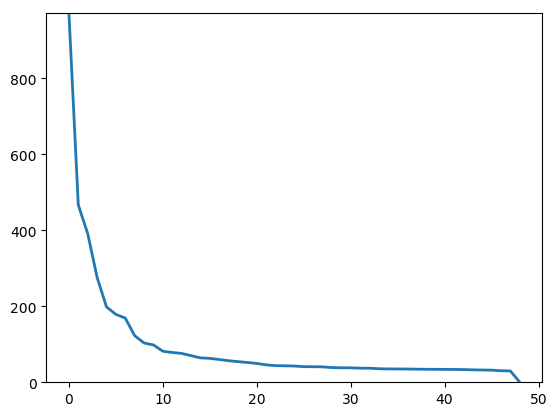

In [19]:
plot(D, linewidth = 2)
ylim(0, maximum(D))
show()

Display the leading eigenvectors - they look like Fourier modes.

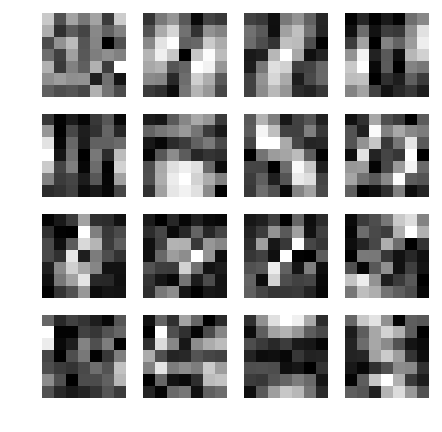

In [20]:
figure(figsize = (5,5))
for i in 1:16
    imageplot(abs(reshape(V[:,i], (w1,w1))), "", [4, 4, i])
end

Patch dimensionality reduction operator.

In [21]:
iresh = Q -> reshape(Q', (n, n, d)) # order = "F"
descriptor = f -> iresh(V[: , 1 : d]'*remove_mean(resh(P)))
remove_mean(resh(P))[1, :]

16384-element Array{Float64,1}:
  0.0181579  
 -0.0498038  
  0.0109662  
 -0.0307396  
  0.00246293 
 -0.0647175  
  0.00481463 
 -0.026067   
 -0.0604121  
  0.0389505  
 -0.0926851  
  0.0303433  
 -0.000775231
  ⋮          
 -0.0762734  
 -0.058204   
 -0.0511908  
  0.0971046  
  0.0735904  
  0.0326445  
 -0.0496297  
 -0.077153   
  0.0202048  
  0.0491652  
  0.0443107  
  0.0633233  

Each $H(i,j,:)$ is a $d$-dimensional descriptor
of a patch.

In [22]:
H = descriptor(f)
H[1, 1, :]

25-element Array{Float64,1}:
 -2.0383e-17 
 -0.00393133 
  0.00243557 
 -0.0114533  
 -0.00151672 
  0.0278182  
  0.0116923  
  0.00665436 
 -0.00496117 
 -0.00314733 
  0.046866   
  0.00205132 
 -0.00485746 
  0.0102409  
 -0.118802   
 -0.0335784  
  0.039943   
 -0.076942   
 -0.0385477  
 -0.114927   
 -0.0307951  
  0.018783   
  0.00526023 
  0.000303004
 -0.0135385  

Non-local Filter
----------------
NL-means applies, an adaptive averaging kernel
is computed from patch distances to each pixel location.


We denote $H_{i} \in \RR^d$ the descriptor at pixel $i$.
We define the distance matrix
$$ D_{i,j} = \frac{1}{w_1^2}\norm{H_i-H_j}^2. $$



Operator to compute the distances $(D_{i,j})_j$ between the patch around $i=(i_1,i_2)$
and all the other ones.

In [26]:
distance = i -> sum((H - repeat(reshape(H[i[1], i[2], :], (1, 1, length(H[i[1], i[2], :]))), inner = [n, n, 1])).^2, 3)./(w1*w1)

# distance = i -> sum( (H - repeat(H[i[1], i[2], :], inner = [n n 1])).^2, 3 )/(w1*w1);



The non-local mean filter computes a denoised image $\tilde f$ as :

$$ \tilde f_i = \sum_j K_{i,j} f_j $$
where the weights $K$ are computed as :
$$ K_{i,j} = \frac{ \tilde K_{i,j} }{ \sum_{j'} \tilde K_{i,j'} }
      \qandq
   \tilde K_{i,j} = e^{-\frac{D_{i,j}}{2\tau^2}} . $$



The width $\tau$ of the Gaussian is very important and should be adapted to match
the noise level.



Compute and normalize the weight.

In [27]:
normalize = K -> K./sum(K)
kernel = (i, tau) -> normalize(exp(-distance(i)./(2*tau^2)))

(::#21) (generic function with 1 method)

Compute a typical example of kernel for some pixel position $(x,y)$.

In [28]:
tau = .05
i = [83, 72]
sum( (H - repeat(H[i[1], i[2], :], inner = [n n 1])).^2, 3 )/(w1*w1)
# D = distance(i)
# H[i[1], i[2], :]
# K = kernel(i, tau)
# D

128×128×1 Array{Float64,3}:
[:, :, 1] =
 0.0025407   0.00137235  0.00248539  …  0.00441786  0.0044613   0.00307555
 0.00298647  0.00159787  0.0023026      0.00276817  0.002546    0.00220625
 0.00209326  0.00223415  0.00213586     0.00289036  0.00273753  0.00368186
 0.0024052   0.00204956  0.00176615     0.00273088  0.00241758  0.00246141
 0.00167064  0.00287249  0.00246354     0.00230845  0.00257007  0.00169669
 0.0032485   0.00229447  0.00267868  …  0.0024397   0.0031267   0.00218857
 0.00261466  0.00187851  0.0028685      0.00198043  0.00202942  0.00171582
 0.00274612  0.00252438  0.00402323     0.00364429  0.00209784  0.00262875
 0.0027712   0.00153067  0.00179669     0.00399947  0.0013504   0.00243055
 0.0025133   0.00282752  0.00277393     0.0026479   0.00213833  0.00138461
 0.0020163   0.00221374  0.00146161  …  0.00211173  0.00212036  0.00248649
 0.00152513  0.00232212  0.00184824     0.0018082   0.00152164  0.0019176 
 0.00159721  0.00221199  0.00177349     0.00221359  0.002698

Display the squared distance and the kernel.

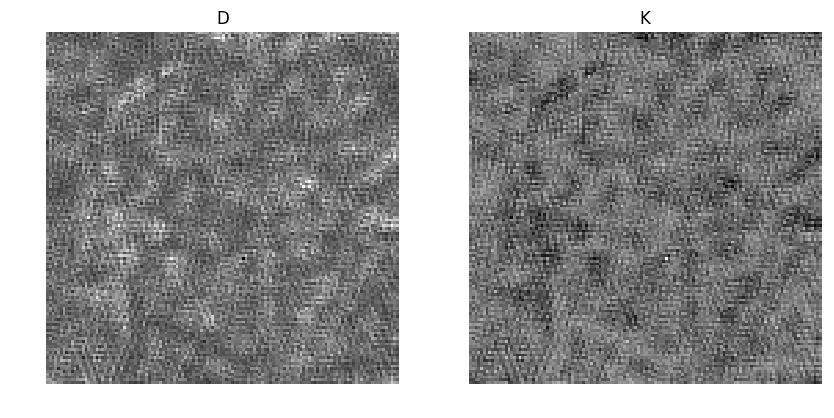

PyObject <matplotlib.text.Text object at 0x000000001EE28F60>

In [29]:
figure(figsize = (10,10))
imageplot(D[:, :], "D", [1, 2, 1])
imageplot(K[:, :], "K", [1, 2, 2])

Localizing the Non-local Means
------------------------------
We set a "locality constant" $q$ that set the maximum distance between
patches to compare. This allows to speed up computation, and makes
NL-means type methods semi-global (to avoid searching in all the image).

In [27]:
q = 14

14

Using this locality constant, we compute the distance between patches
only within a window.
Once again, one should be careful about boundary conditions.

In [29]:
#selection = i -> np.array((clamP(np.arange(i[1]-q,i[1] + q + 1), 0, n-1), clamP(np.arange(i[1]-q,i[1] + q + 1), 0, n-1)))
selection = i -> [clamP(collect(i[1] - q + 1 : i[1] + q + 1), 1, n)'; clamP(collect(i[1] - q + 1 : i[1] + q + 1), 1, n)']

(::#19) (generic function with 1 method)

Compute distance and kernel only within the window.

In [30]:
function distance_0(i, sel)
    H1 = (H[sel[1, :],:,:])
    H2 = (H1[:,sel[2, :],:])
    return sum((H2 - repeat(reshape(H[i[1], i[2], :], (1, 1, length(H[i[1], i[2], :]))), inner = [length(sel[1, :]), length(sel[2, :]), 1])), 
    3)/(w1*w1)
end

distance = i -> distance_0(i, selection(i))
kernel = (i, tau) -> normalize(exp(-distance(i)./(2*tau^2)))



(::#23) (generic function with 1 method)

Compute a typical example of kernel for some pixel position $(x,y)$.

Display the squared distance and the kernel.

In [31]:
sel = selection(i)
D = distance(i)
K = kernel(i, tau)


29×29×1 Array{Float64,3}:
[:, :, 1] =
 0.00150359   0.00331627   6.83253e-5   …  0.00239348   0.00041119 
 0.000467514  0.000236781  0.00251782      0.000850111  0.00193867 
 0.00075818   0.00360707   0.000962478     0.000245312  0.000591722
 0.000267653  0.000326701  0.000258885     0.000398922  0.00233789 
 0.00084619   0.000563018  0.00307985      0.00269301   0.000650247
 0.000846278  0.00179653   0.000351704  …  0.000408738  0.000373752
 0.00141865   0.000229179  0.000374389     0.00198729   0.00115064 
 0.000221269  0.00258376   0.000605844     0.00121756   0.000417504
 0.000918029  0.000436057  0.00128788      0.00127099   0.000482956
 0.000516951  0.000268027  0.00166792      0.000316963  0.00505622 
 0.00169658   0.000419005  0.00126345   …  0.000606645  0.000626355
 0.00180485   0.000572404  0.000599983     0.00140198   0.00151399 
 0.000583443  0.00231071   0.000851272     0.000184051  0.000926002
 ⋮                                      ⋱                          
 8.48065e-

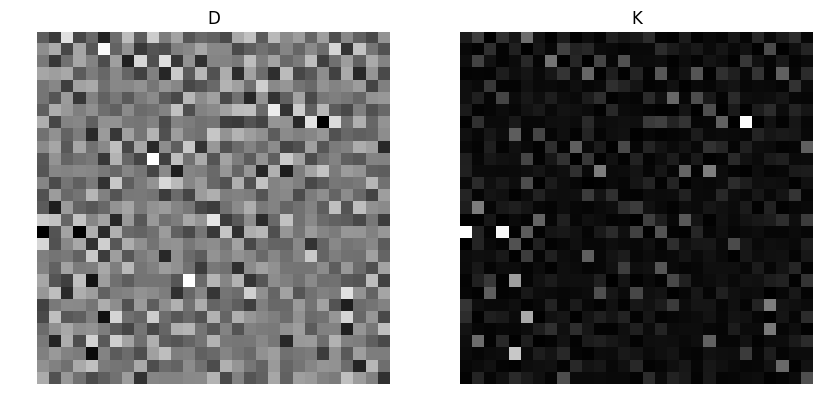

PyObject <matplotlib.text.Text object at 0x0000000022CA5E10>

In [32]:
figure(figsize = (10,10))

imageplot(D[:, :], "D", [1, 2, 1])
imageplot(K[:, :], "K", [1, 2, 2])

The NL-filtered value at pixel $(x,y)$ is obtained by averaging the values
of $f$ with the weight $K$.

In [33]:
function NLval_0(K,sel)
    f_temp = f[sel[1, :], :]
    return sum(K.*f_temp[:, sel[1, :]])
end

NLval = (i, ta) -> NLval_0(kernel(i, tau), selection(i))


(::#25) (generic function with 1 method)

We apply the filter to each pixel location
to perform the NL-means algorithm.

In [34]:
(Y, X) = meshgrid(0 : n - 1, 0 : n - 1)

function arrayfun(f, X, Y)
    n = size(X)[1]
    p = size(Y)[1]
    R = zeros(n, p)
    for k in 1:n
        for l in 1:p
            R[k,l] = f(k,l)
        end
    end
    return R
end

NLmeans = tau -> arrayfun((i1, i2) -> NLval([i1,i2], tau), X, Y)

(::#27) (generic function with 1 method)

Display the result for some value of $\tau$.

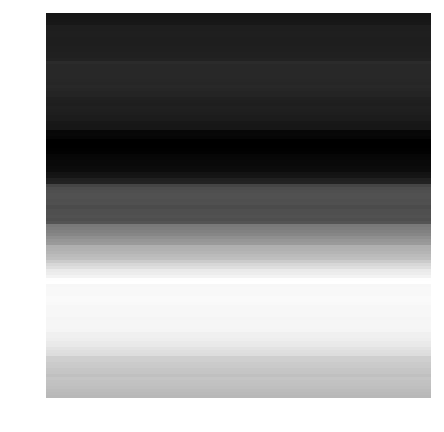

In [36]:
tau = .03

figure(figsize = (5,5))
imageplot(NLmeans(tau))
#NLmeans(tau)
#n = size(X)[1]
#p = size(Y)[1]
#R = zeros(n, p)
#for k in 1:n
#    for l in 1:p
#        R[k,l] = f(k,l)
#    end
#end


In [ ]:
tau = .03


__Exercise 1__

Compute the denoising result for several values of $\tau$ in order to
determine the optimal denoising that minimizes $\norm{\tilde f - f_0}$.

In [36]:
#run -i nt_solutions/denoisingadv_6_nl_means/exo1
include("Exos\\denoisingadv_6_nl_means\\exo1.jl")

LoadError: LoadError: BoundsError: attempt to access 128×128×25 Array{Float64,3} at index [[0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],Colon(),Colon()]
while loading C:\Users\Ayman\.julia\v0.5\Exos\denoisingadv_6_nl_means\exo1.jl, in expression starting on line 6

In [36]:
## Insert your code here.

Display the best result.

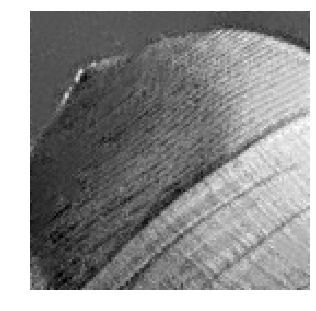

In [37]:
plt.figure(figsize = (5,5))
imageplot(clamp(fNL))

__Exercise 2__

Explore the influence of the $q$ and $w$ parameters.

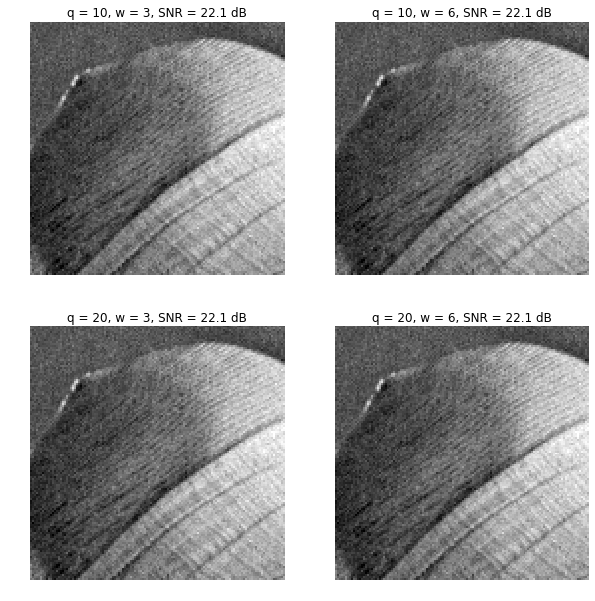

In [38]:
run -i nt_solutions/denoisingadv_6_nl_means/exo2

In [39]:
## Insert your code here.

Bibliography
------------
<html><a name="biblio"></a></html>


* [BuaCoMoA05] Buades, B. Coll, J.f Morel, [A review of image denoising algorithms, with a new one][1], SIAM Multiscale Modeling and Simulation, Vol 4 (2), pp: 490-530, 2005.

[1]:http://dx.doi.org/10.1137/040616024